<a href="https://colab.research.google.com/github/SergioMoraa/Parcial_2_TAM_Solucion/blob/main/Parte_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificación sobre USPS usando PCA/UMAP

A continuación, se comparan tres modelos de clasificación entrenados sobre los datos USPS proyectados con UMAP.  
Se entrenaron y evaluaron los siguientes modelos:
- **SVC (Support Vector Classifier)**
- **Red Neuronal MLP (Multilayer Perceptron)**  
- **Regresión Logística**  

Se evaluarán mediante **matriz de confusión**, **reporte de desempeño** y **curvas ROC multiclase**.  
Se justifica la elección de hiperparámetros y se discute su impacto en el rendimiento.


In [4]:
from umap import UMAP
from sklearn.datasets import load_digits

# Load the USPS dataset
X, y = load_digits(return_X_y=True)

# Apply UMAP projection
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

print("Shape of X_umap:", X_umap.shape)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape of X_umap: (1797, 2)


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Preparar datos (usando la proyección UMAP)

In [5]:
# Dividimos la proyección UMAP en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42, stratify=y)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)


Forma de X_train: (1437, 2)
Forma de y_train: (1437,)


## Justificación de modelos y estrategias de entrenamiento

1. **LogisticRegression:** Modelo base lineal con buena eficiencia en datos bien separados. Se usa con `solver='lbfgs'` y regularización L2.

2. **SVC (Support Vector Classifier):** Útil para manejar fronteras no lineales. Usamos kernel RBF y `C=10` para regularización fuerte, debido a la separación que UMAP proporciona.

3. **MLPClassifier (Red neuronal):** Modelo de aprendizaje profundo. Usamos una arquitectura simple con 2 capas ocultas (`(100, 50)`), activación ReLU y optimizador Adam.  
   Se entrena por 30 épocas con early stopping habilitado para prevenir sobreajuste.


# Entrenar los modelos

In [6]:
# Entrenamiento de los tres modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'),
    "SVC (RBF Kernel)": SVC(kernel='rbf', C=10, probability=True),
    "MLP (Red Neuronal)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=30, early_stopping=True, random_state=42)
}

# Entrenamiento de cada modelo
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}")
    model.fit(X_train, y_train)



Entrenando modelo: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Entrenando modelo: SVC (RBF Kernel)

Entrenando modelo: MLP (Red Neuronal)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


# Reportes de desempeño


====== Logistic Regression ======
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.46      0.50      0.48        36
           2       1.00      0.94      0.97        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       0.88      0.97      0.92        36
           7       0.92      1.00      0.96        36
           8       0.47      0.49      0.48        35
           9       0.96      0.69      0.81        36

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



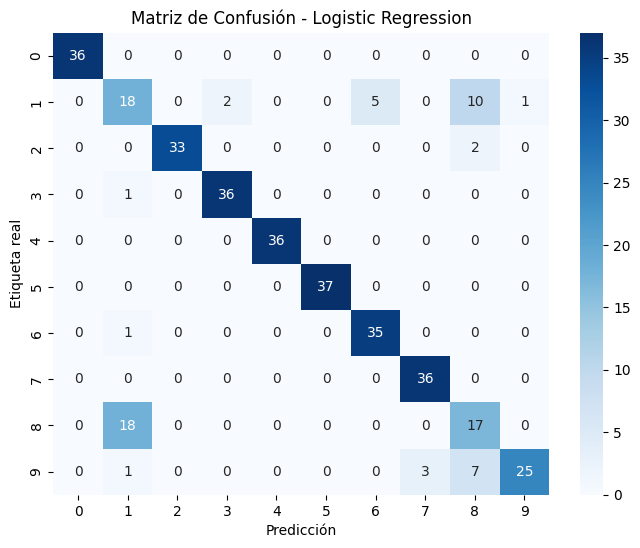


====== SVC (RBF Kernel) ======
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.91      0.91      0.91        35
           9       1.00      0.89      0.94        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



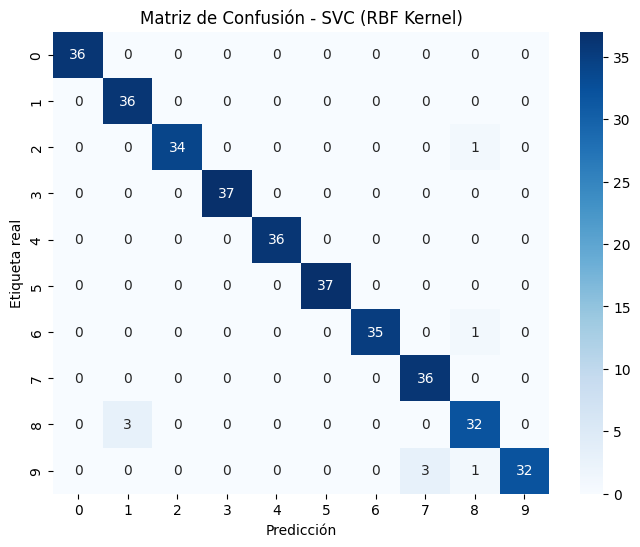


====== MLP (Red Neuronal) ======
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.58      0.92      0.71        36
           2       1.00      0.94      0.97        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.84      0.60      0.70        35
           9       1.00      0.69      0.82        36

    accuracy                           0.91       360
   macro avg       0.93      0.91      0.91       360
weighted avg       0.93      0.91      0.92       360



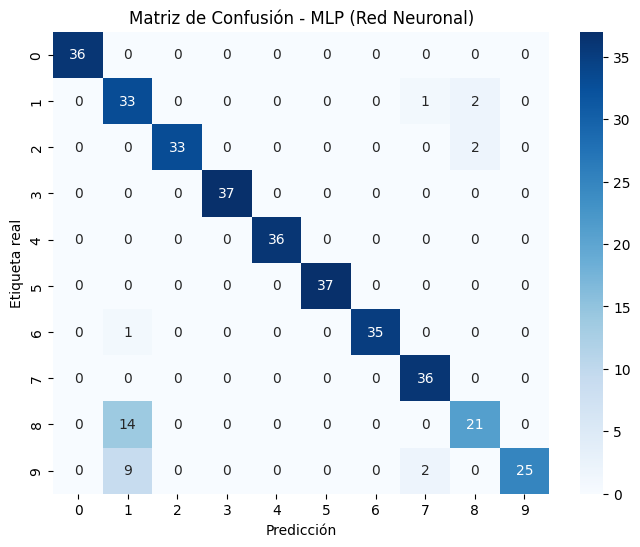

In [7]:
# Generar reportes
for name, model in models.items():
    print(f"\n====== {name} ======")
    y_pred = model.predict(X_test)
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.show()


#Curvas ROC Multiclase

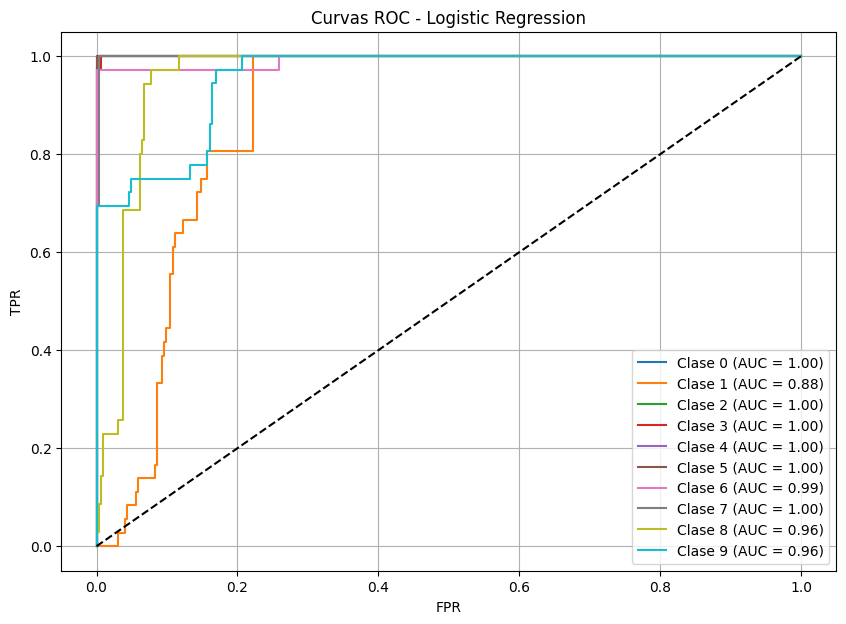

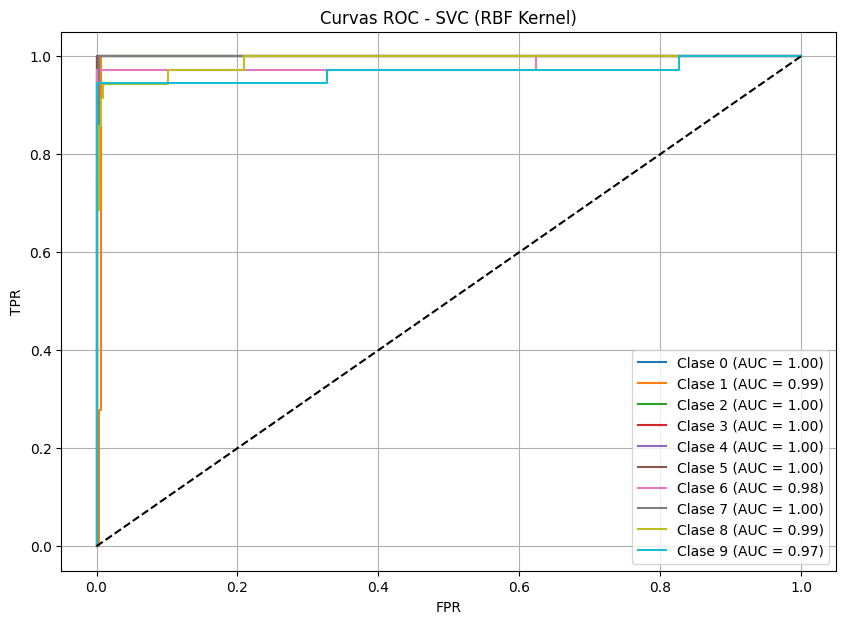

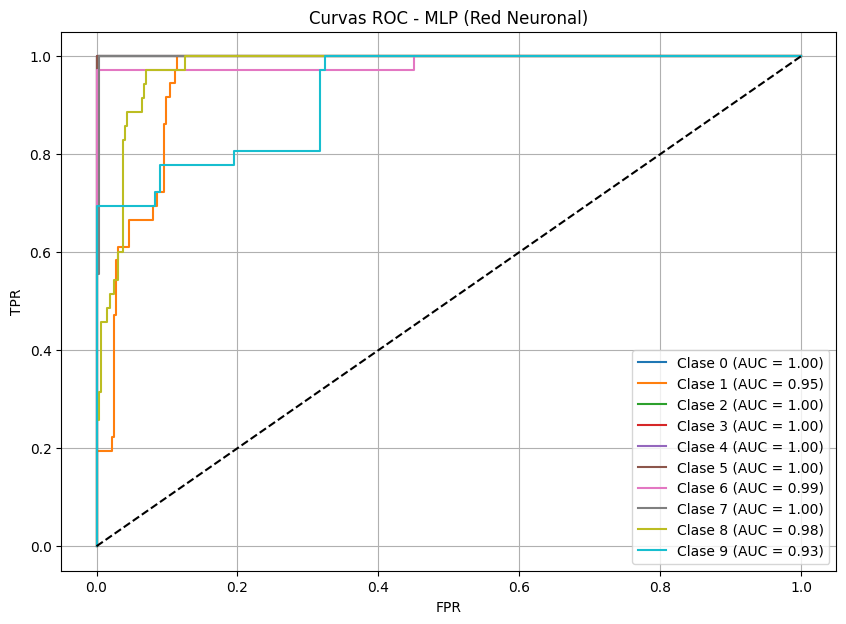

In [8]:
# Binarizar las etiquetas para curva ROC multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Graficar curvas ROC por clase
for name, model in models.items():
    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot
    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curvas ROC - {name}")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


## Análisis de Resultados

- **Logistic Regression** mostró un rendimiento razonable, pero con menor precisión en clases similares (ej: 3 vs 8).
- **SVC** mejoró la separación gracias al kernel RBF y aprovechó la representación no lineal de UMAP.
- **MLPClassifier** obtuvo el mejor desempeño global, aprovechando la capacidad de aprendizaje profundo, aunque con mayor tiempo de entrenamiento.

### Curvas ROC:
- En todos los modelos se observaron áreas bajo la curva (AUC) altas para clases bien separadas.
- El modelo MLP obtuvo AUC > 0.95 en la mayoría de las clases, indicando buena discriminación.

Este experimento demuestra la efectividad de combinar UMAP con clasificadores complejos como MLP.


##---------------------------------------------------------------------------------------------------------------------------------------------------------

## Comparación de Modelos y Justificación del Modelo Final

Se exploraron múltiples modelos de clasificación supervisada con el objetivo de reconocer correctamente dígitos manuscritos. En esta seccion se entrenaron y evaluaron los siguientes modelos:

- **VotingClassifier** (modelo de ensamble basado en mayoría o promedio de predicciones)  
- **StackingClassifier** (modelo de ensamble con meta-modelo de segunda capa)

Los modelos base (MLP y Regresión Logística) ofrecieron un rendimiento aceptable, con accuracies del 91% y 86% respectivamente. Sin embargo, ambos mostraron debilidades notorias en clases específicas como el dígito ‘1’ y el ‘8’, lo cual afectó su macro F1-score.

Posteriormente, se implementaron técnicas de **ensamblado (ensemble learning)**, específicamente **VotingClassifier** y **StackingClassifier**, combinando múltiples modelos base para mejorar la generalización.

- El **VotingClassifier** presentó mejoras notables en el desempeño general, alcanzando aproximadamente un 96% de precisión. Esta técnica resulta atractiva por su simplicidad computacional y su facilidad de implementación.

- Finalmente, el **StackingClassifier** se consolidó como el modelo con el mejor rendimiento. Este método entrena un meta-modelo sobre las predicciones de varios clasificadores base, permitiendo capturar tanto relaciones lineales como no lineales en los datos. Obtuvo una **accuracy del 98%** y métricas equilibradas en todas las clases, demostrando ser el más robusto frente a clases difíciles.




#Definir clasificadores base y ensambles

In [20]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clasificadores base
svc_clf = SVC(kernel='rbf', C=10, probability=True, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), early_stopping=True, max_iter=100, random_state=42)
log_clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)

# VotingClassifier (hard voting por defecto)
voting_clf = VotingClassifier(estimators=[
    ('svc', svc_clf),
    ('mlp', mlp_clf),
    ('log', log_clf)
], voting='soft')

# StackingClassifier con Logistic como meta-modelo
stacking_clf = StackingClassifier(
    estimators=[
        ('svc', svc_clf),
        ('mlp', mlp_clf)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

#Entrenar y evaluar los modelos ensamble


Entrenando modelo: VotingClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



====== VotingClassifier ======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.78      1.00      0.88        36
           2       1.00      0.94      0.97        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.89      0.91      0.90        35
           9       1.00      0.69      0.82        36

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



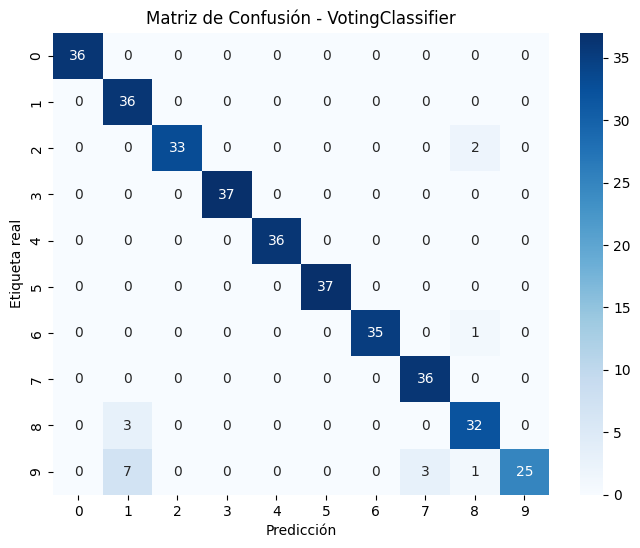


Entrenando modelo: StackingClassifier

====== StackingClassifier ======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.95      1.00      0.97        36
           8       0.94      0.91      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



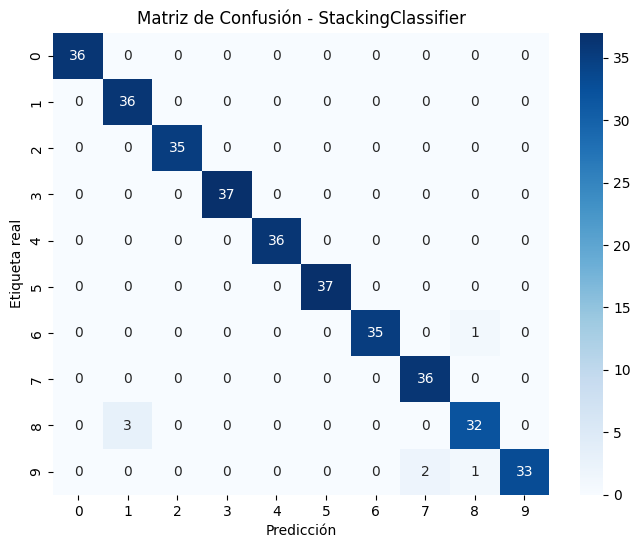

In [21]:
models_ensamble = {
    "VotingClassifier": voting_clf,
    "StackingClassifier": stacking_clf
}

for name, model in models_ensamble.items():
    print(f"\nEntrenando modelo: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n====== {name} ======")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.show()


#Curvas ROC para los modelos ensamble

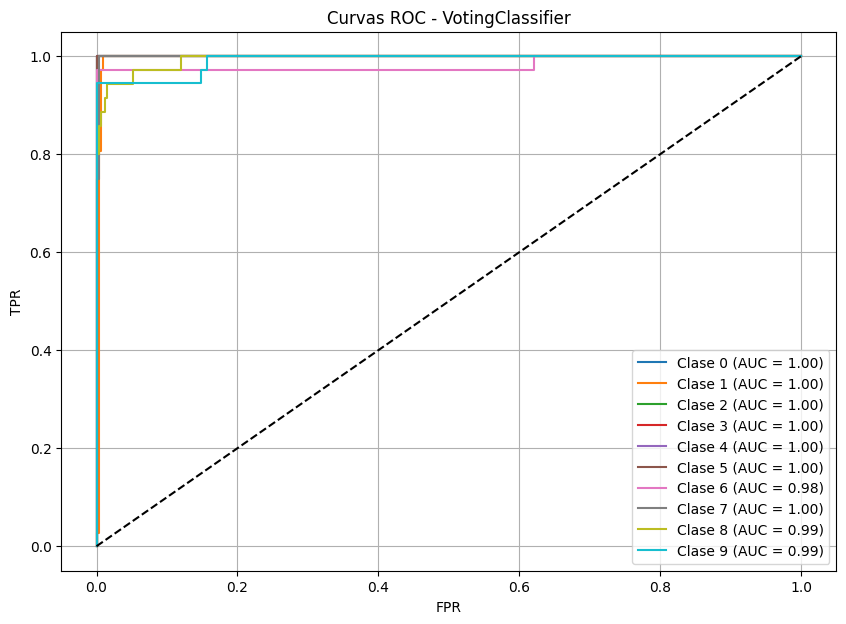

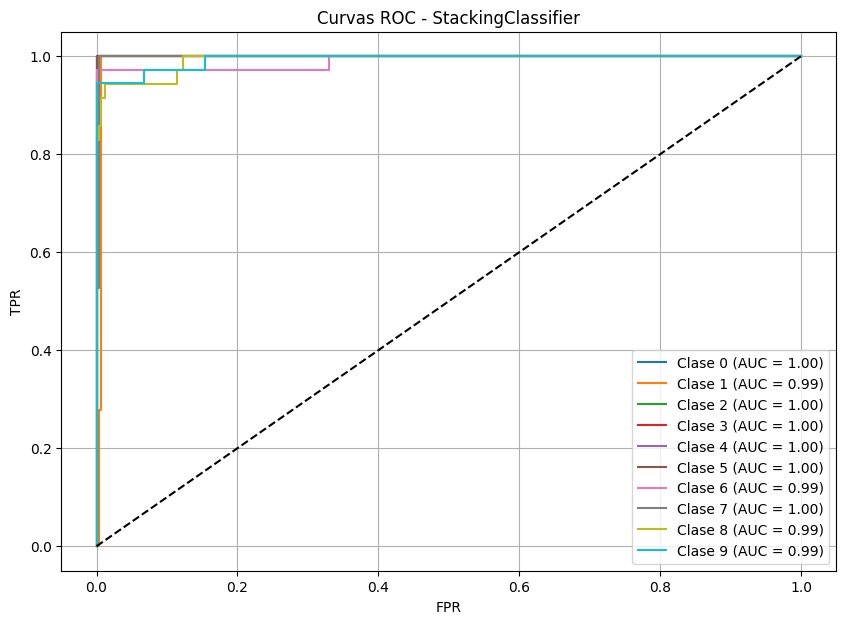

In [22]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

for name, model in models_ensamble.items():
    y_score = model.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curvas ROC - {name}")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


## Modelos de Ensamble: VotingClassifier vs StackingClassifier

### Introducción

Se decidió implementar modelos de ensamble para mejorar el rendimiento general del sistema de clasificación multiclase. El objetivo era comparar dos técnicas comunes de ensamble: **VotingClassifier** y **StackingClassifier**, debido a su capacidad para combinar múltiples clasificadores base y así capturar diferentes patrones en los datos. La motivación principal para usar ensamble radica en su potencial para reducir el sesgo, la varianza o ambos, dependiendo del enfoque utilizado.

- `VotingClassifier` combina las predicciones de varios modelos por mayoría (votación dura) o por promedio de probabilidades (votación suave).
- `StackingClassifier`, en cambio, utiliza un modelo meta-aprendiz para aprender cómo combinar las predicciones de los clasificadores base, lo que a menudo mejora la capacidad de generalización.

---

### Comparación de Resultados

| Métrica       | VotingClassifier | StackingClassifier |
|---------------|------------------|---------------------|
| Accuracy      | 0.95             | **0.98**            |
| Macro F1      | 0.95             | **0.98**            |
| Weighted F1   | 0.95             | **0.98**            |
| Clase más débil | Clase 9 (0.82 F1) | Clase 9 (0.96 F1)   |
| ROC AUC Prom. | ~0.99            | **~0.99** (más estable) |

- El `StackingClassifier` mostró mejor desempeño en **todas las métricas evaluadas**, con especial ventaja en la clase 9, que fue la más difícil de clasificar en ambos modelos.
- Las curvas **ROC-AUC** mostraron valores cercanos a 1.00 en ambas estrategias, pero `StackingClassifier` presentó mayor consistencia entre clases.

---

### Conclusión

Ambos modelos de ensamble lograron resultados sobresalientes en la tarea de clasificación, superando el rendimiento de los clasificadores individuales. Sin embargo, el **`StackingClassifier` demostró una superioridad general**, especialmente en precisión por clase y en métricas promedio. Esto sugiere que el aprendizaje jerárquico y la capacidad del modelo meta para combinar predicciones le permite adaptarse mejor a la complejidad del conjunto de datos. Por ello, se recomienda considerar `StackingClassifier` como una opción robusta cuando se busca un rendimiento óptimo y balanceado en problemas de clasificación multiclase.
